# Build a Data Graph Explorer

For this challenge, you need to create a data graph explorer using Python that take input and do the following:

- Get a .csv file in three ways:
  - uploading it from the local computer
  - getting a url from user input
  - putting the url in the code

- Use the Pandas library to save the .csv as a dataframe
- Print headings and the first two rows
- Store the column names as a list
- Choose one or two columns and convert the data to Numpy arrays
- Display data as a scatter plot or a line graph
- Be able to do this for different column combinations, and interpret the graphs


# Pandas

In [9]:
import pandas as pd
from google.colab import files
import io

In [29]:
# dialog to upload from computer:
uploaded = files.upload()
file_name = next(iter(uploaded))
table_1 = pd.read_csv(io.BytesIO(uploaded[file_name]))

Saving vgchartz-2024.csv to vgchartz-2024.csv


In [ ]:
# get .csv from a URL
# from user input
url = 'https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv'
table_2 = pd.read_csv(url)
# putting the url in the code
table_3 = pd.read_csv('https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv')


Those imports and that url variable will be good for maybe 20 minutes, so you don't have to repeat those steps each time. Now determine what columns you want and convert them to numpy arrays.

# Numpy

In [30]:
import numpy as np
df=table_1
df.head()

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB


In [32]:
# Column names as a variable
col_names = df.columns

print("\n column names:")
for col in col_names:
    print(col)

# Another way to get column names
print("\n column names:")
for a in range(len(col_names)):
    print(a, " ", col_names[a])





 column names:
img
title
console
genre
publisher
developer
critic_score
total_sales
na_sales
jp_sales
pal_sales
other_sales
release_date
last_update

 column names:
0   img
1   title
2   console
3   genre
4   publisher
5   developer
6   critic_score
7   total_sales
8   na_sales
9   jp_sales
10   pal_sales
11   other_sales
12   release_date
13   last_update


In [36]:
# Store column names as a list for the analysis
selected_cols = ['title', 'console', 'genre', 'critic_score', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']
print("Selected columns:")
print(selected_cols)


Selected columns:
['title', 'console', 'genre', 'critic_score', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']


In [37]:
# Check for missing values in selected columns
print("Missing values in selected columns:")
print(df[selected_cols].isnull().sum())


Missing values in selected columns:
title               0
console             0
genre               0
critic_score    57338
na_sales        51379
jp_sales        57290
pal_sales       51192
other_sales     48888
dtype: int64


In [39]:
# Let’s try critic_score vs total_sales as an example:

import numpy as np

# Drop rows with missing critic_score or total_sales
df_clean = df.dropna(subset=['critic_score', 'total_sales'])

# Convert to NumPy arrays
x = df_clean['critic_score'].to_numpy()
y = df_clean['total_sales'].to_numpy()

print("First 5 values of x (critic_score):", x[:5])
print("First 5 values of y (total_sales):", y[:5])


First 5 values of x (critic_score): [9.4 9.7 9.6 8.1 8.7]
First 5 values of y (total_sales): [20.32 19.39 16.15 15.09 14.82]


# Matplotlib

Graph relation between sales and critic socore

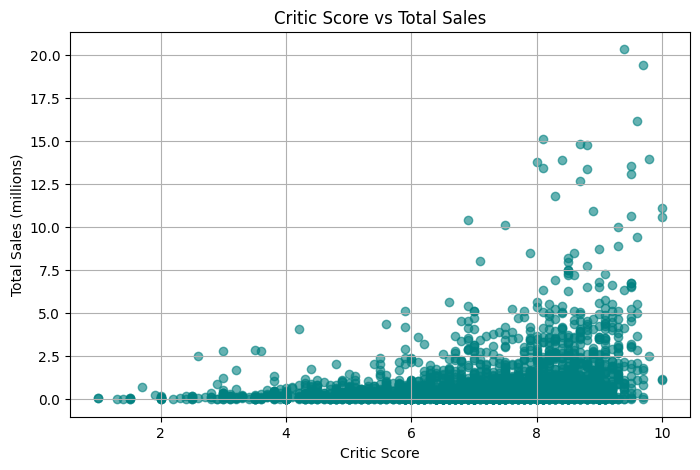

In [40]:
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(8,5))
plt.scatter(x, y, color='teal', alpha=0.6)
plt.title('Critic Score vs Total Sales')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (millions)')
plt.grid(True)
plt.show()


Using variables for column names

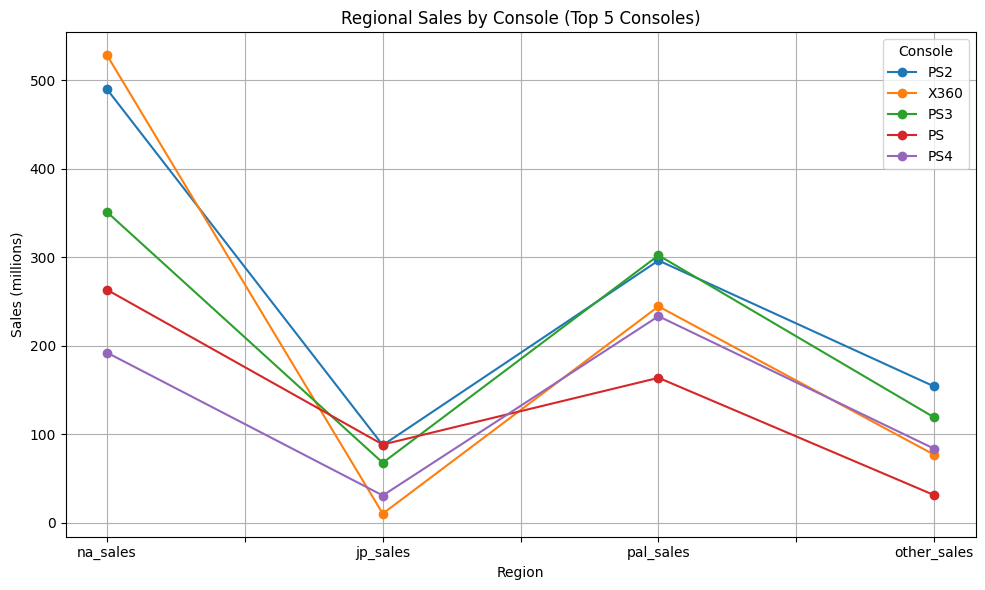

In [42]:
# Sum sales by console and region
region_cols = ['na_sales', 'jp_sales', 'pal_sales', 'other_sales']
console_region_sales = df.groupby('console')[region_cols].sum()

# Sort consoles by total sales across all regions
console_region_sales['total'] = console_region_sales.sum(axis=1)
top5_consoles = console_region_sales.sort_values(by='total', ascending=False).head(5)

# Drop the total column to just focus on regions
top5_consoles = top5_consoles.drop(columns='total')

# Transpose so regions are x-axis, and lines are consoles
top5_consoles.T.plot(kind='line', marker='o', figsize=(10,6))

# Plot styling
plt.title('Regional Sales by Console (Top 5 Consoles)')
plt.xlabel('Region')
plt.ylabel('Sales (millions)')
plt.grid(True)
plt.legend(title='Console')
plt.tight_layout()
plt.show()




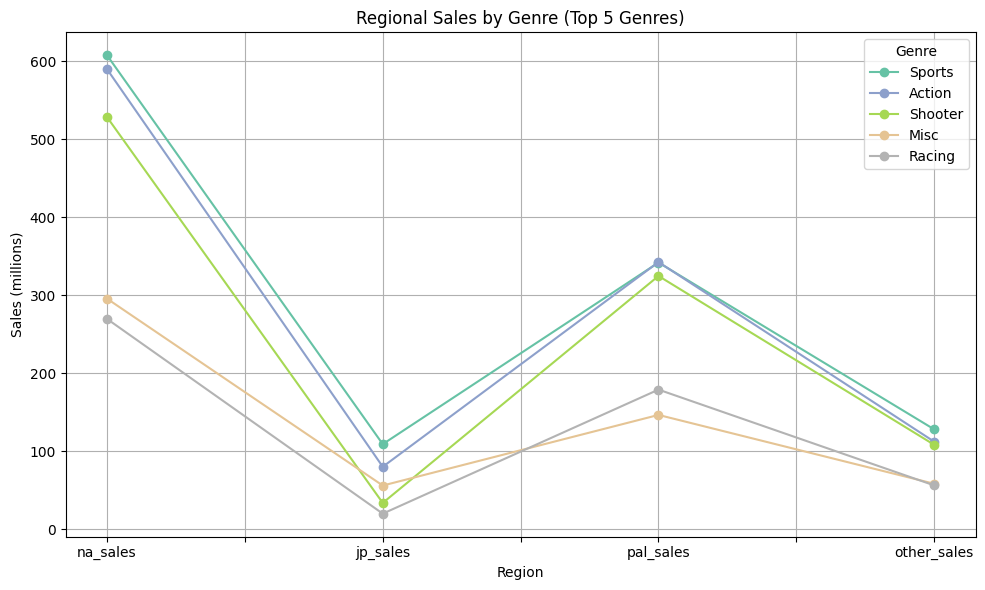

In [43]:
# Group sales by genre and region
genre_region_sales = df.groupby('genre')[region_cols].sum()

# Sort genres by total sales and select top 5
genre_region_sales['total'] = genre_region_sales.sum(axis=1)
top5_genres = genre_region_sales.sort_values(by='total', ascending=False).head(5)

# Drop the total column
top5_genres = top5_genres.drop(columns='total')

# Transpose so regions are x-axis, and lines are genres
top5_genres.T.plot(kind='line', marker='o', figsize=(10,6), colormap='Set2')

# Plot styling
plt.title('Regional Sales by Genre (Top 5 Genres)')
plt.xlabel('Region')
plt.ylabel('Sales (millions)')
plt.grid(True)
plt.legend(title='Genre')
plt.tight_layout()
plt.show()


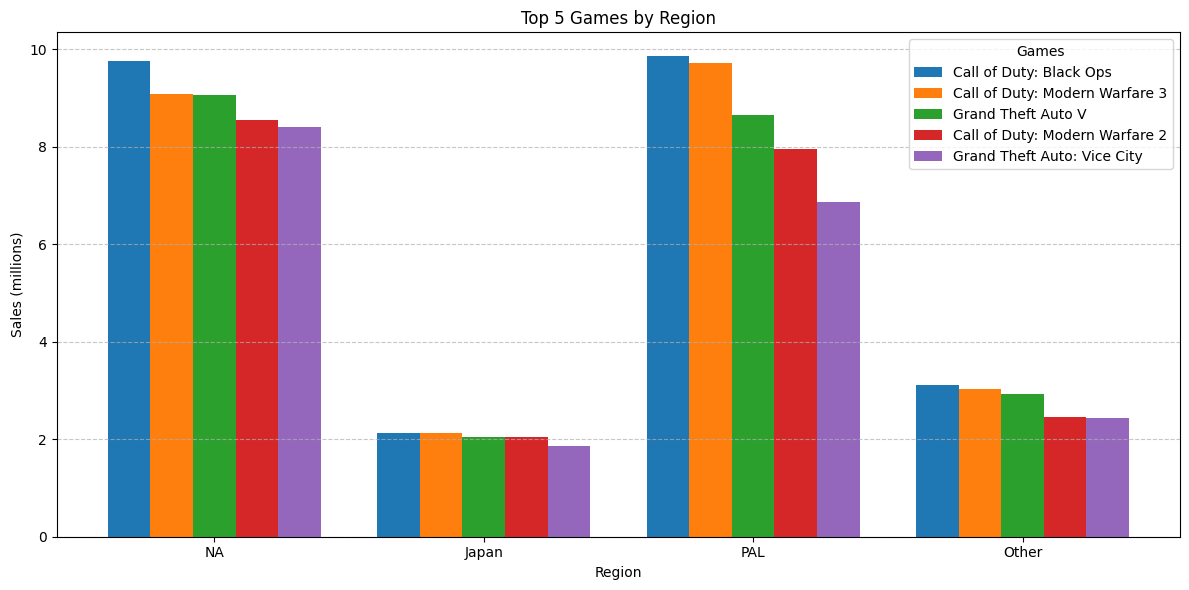

In [45]:
import matplotlib.pyplot as plt

#Top 5 games in global sales per region

# Step 1: Define region columns
regions = ['na_sales', 'jp_sales', 'pal_sales', 'other_sales']
region_labels = ['NA', 'Japan', 'PAL', 'Other']

# Step 2: Create a dictionary to store top 5 games per region
top_games_per_region = {}

for region in regions:
    top_games = df[['title', region]].sort_values(by=region, ascending=False).head(5)
    top_games_per_region[region] = top_games.set_index('title')[region]

# Step 3: Plot setup
fig, ax = plt.subplots(figsize=(12,6))

bar_width = 0.15
group_spacing = 0.2  # Add space between groups
colors = plt.cm.tab10.colors  # 10 distinct colors

# Calculate positions with space between groups
group_positions = []
current_pos = 0
for _ in regions:
    group_positions.append(current_pos)
    current_pos += bar_width * 5 + group_spacing  # 5 bars per group + space

# Draw bars for each game in each region
for i in range(5):  # 5 top games
    bar_values = [top_games_per_region[region].values[i] for region in regions]
    bar_labels = [top_games_per_region[region].index[i] for region in regions]
    bar_positions = [pos + i * bar_width for pos in group_positions]
    ax.bar(bar_positions, bar_values, width=bar_width, label=bar_labels[0], color=colors[i % len(colors)])

# Center x-ticks under each group
tick_positions = [pos + 2 * bar_width for pos in group_positions]
ax.set_xticks(tick_positions)
ax.set_xticklabels(region_labels)

# Labels and formatting
ax.set_title('Top 5 Games by Region')
ax.set_xlabel('Region')
ax.set_ylabel('Sales (millions)')
ax.legend(title='Games', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



<ipython-input-46-95512c24f33d>:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_palette = plt.cm.get_cmap('tab20', len(all_top_games))  # Enough distinct colors


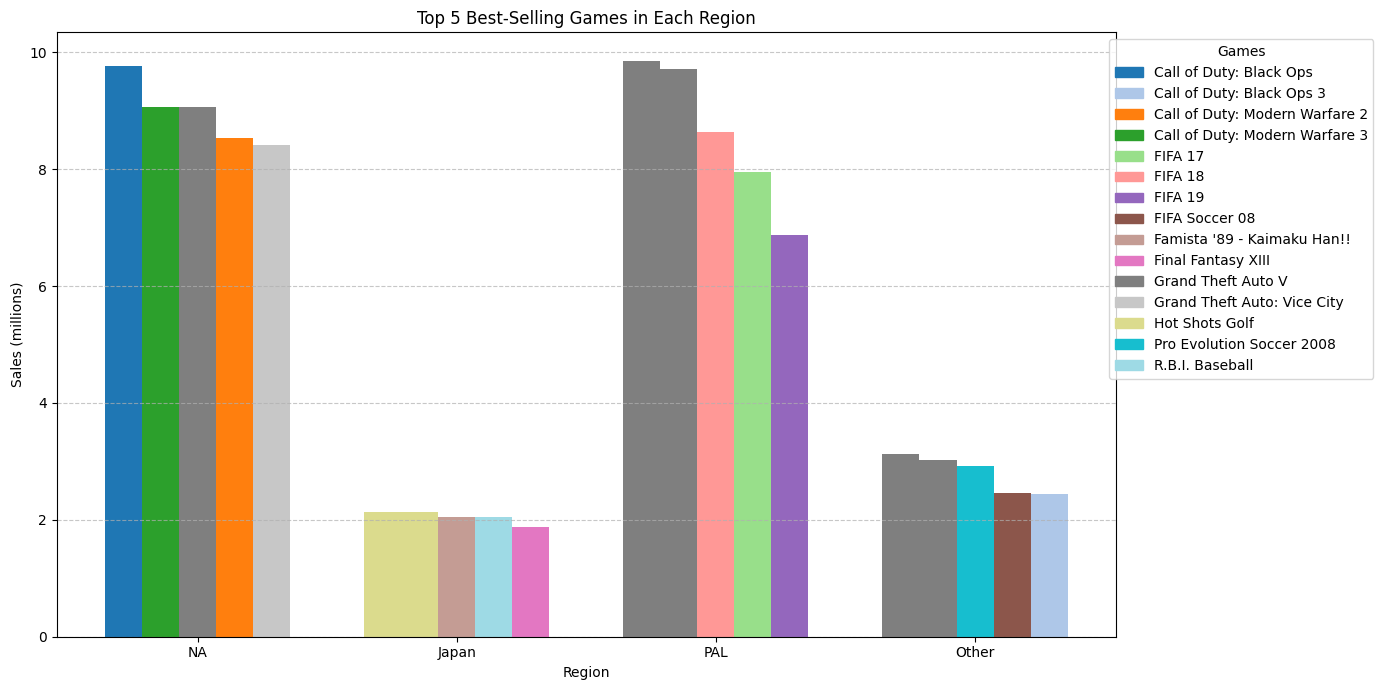

In [46]:
import matplotlib.pyplot as plt

# top games in sales for region

# Step 1: Define region columns and labels
regions = ['na_sales', 'jp_sales', 'pal_sales', 'other_sales']
region_labels = ['NA', 'Japan', 'PAL', 'Other']

# Step 2: Collect Top 5 games for each region (may include duplicates across regions)
top_games_per_region = {}
all_top_games = set()

for region in regions:
    top_games = df[['title', region]].sort_values(by=region, ascending=False).head(5)
    top_games_per_region[region] = top_games.set_index('title')[region]
    all_top_games.update(top_games['title'].values)

# Step 3: Create color map for each unique game
game_color_map = {}
color_palette = plt.cm.get_cmap('tab20', len(all_top_games))  # Enough distinct colors
for idx, game in enumerate(sorted(all_top_games)):
    game_color_map[game] = color_palette(idx)

# Step 4: Setup plot positions
fig, ax = plt.subplots(figsize=(14, 7))
bar_width = 0.15
group_spacing = 0.3

group_positions = []
current_pos = 0
for _ in regions:
    group_positions.append(current_pos)
    current_pos += bar_width * 5 + group_spacing

# Step 5: Plot bars
for i in range(5):  # 5 bars per region
    bar_positions = []
    bar_heights = []
    bar_colors = []
    bar_labels = []

    for idx, region in enumerate(regions):
        top_games = top_games_per_region[region]
        if i < len(top_games):  # in case of short region
            title = top_games.index[i]
            value = top_games.values[i]
            bar_positions.append(group_positions[idx] + i * bar_width)
            bar_heights.append(value)
            bar_colors.append(game_color_map[title])
            bar_labels.append(title)

    ax.bar(bar_positions, bar_heights, width=bar_width, color=bar_colors)

# Step 6: Final touches
tick_positions = [pos + 2 * bar_width for pos in group_positions]
ax.set_xticks(tick_positions)
ax.set_xticklabels(region_labels)
ax.set_title("Top 5 Best-Selling Games in Each Region")
ax.set_xlabel("Region")
ax.set_ylabel("Sales (millions)")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Legend using color map
from matplotlib.patches import Patch
legend_handles = [Patch(color=color, label=game) for game, color in game_color_map.items()]
ax.legend(handles=legend_handles, title="Games", loc='upper right', bbox_to_anchor=(1.25, 1))

plt.tight_layout()
plt.show()


# Some Conclusions

Regional Market Differentiation
The analysis reveals significant regional disparities in platform popularity. North American and European consumers show a preference for consoles such as the Xbox 360 and PlayStation 3, whereas the Japanese market predominantly favors Nintendo platforms (e.g., Nintendo DS, Wii). These trends highlight the importance of localized marketing strategies and cultural alignment in hardware adoption.

Genre Distribution Across Regions
Distinct genre preferences are evident across regions. Action and Shooter games are dominant in North America and Europe, while Role-Playing Games (RPGs) are disproportionately popular in Japan. This suggests that game developers and publishers should consider region-specific preferences when designing and distributing games to maximize engagement and commercial success.

Top-Performing Titles Vary by Market
While certain titles, such as Wii Sports and Mario Kart Wii, achieve global success, regional markets often exhibit unique top performers. The Japanese market, in particular, includes games that, despite limited international exposure, demonstrate strong domestic performance. This underscores the relevance of local trends in determining commercial outcomes.

Correlation Between Critical Reception and Sales
Although some correlation exists between critic scores and total sales, the relationship is not strictly linear. Several high-scoring titles do not necessarily achieve top-tier sales, and conversely, some of the best-selling games have received only moderate critical acclaim. This indicates that while quality assessments play a role, other factors—such as franchise strength, brand recognition, and multiplayer appeal—are also critical drivers of commercial success.

Implications for the Global Gaming Industry
The diversity of preferences across global markets suggests that a universal development and marketing strategy may be insufficient. To optimize performance, industry stakeholders should adopt data-driven, regionally informed approaches that account for localized tastes, platform trends, and cultural influences.